Average 2D pattern’s total pixel value: 1251.047


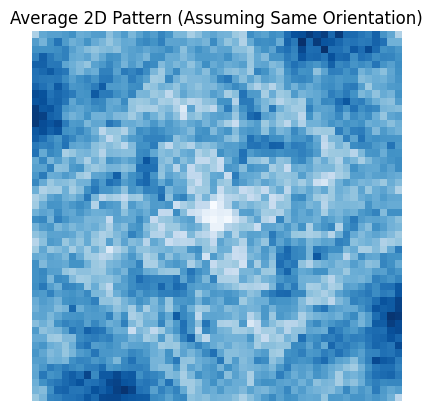

Run 0: Distortia score = 1246.9161061506256
Run 1: Distortia score = 1246.9161061506259
Run 2: Distortia score = 1246.9161061506259
Run 3: Distortia score = 1258.7823523534548
Run 4: Distortia score = 1246.9161061506259
Run 5: Distortia score = 1259.0806756150882
Run 6: Distortia score = 1246.9161061506259
Run 7: Distortia score = 1246.9161061506259
Run 8: Distortia score = 1246.9161061506259
Run 9: Distortia score = 1246.9161061506259
Run 10: Distortia score = 1258.3779674787656
Run 11: Distortia score = 1246.9161061506256
Run 12: Distortia score = 1246.9161061506259
Run 13: Distortia score = 1246.9161061506259
Run 14: Distortia score = 1246.9161061506259
Run 15: Distortia score = 1246.9161061506259
Run 16: Distortia score = 1246.9161061506259
Run 17: Distortia score = 1246.9161061506259
Run 18: Distortia score = 1246.9161061506259
Run 19: Distortia score = 1259.1397053578132
Run 20: Distortia score = 1246.9161061506259
Run 21: Distortia score = 1246.9161061506259
Run 22: Distortia sc

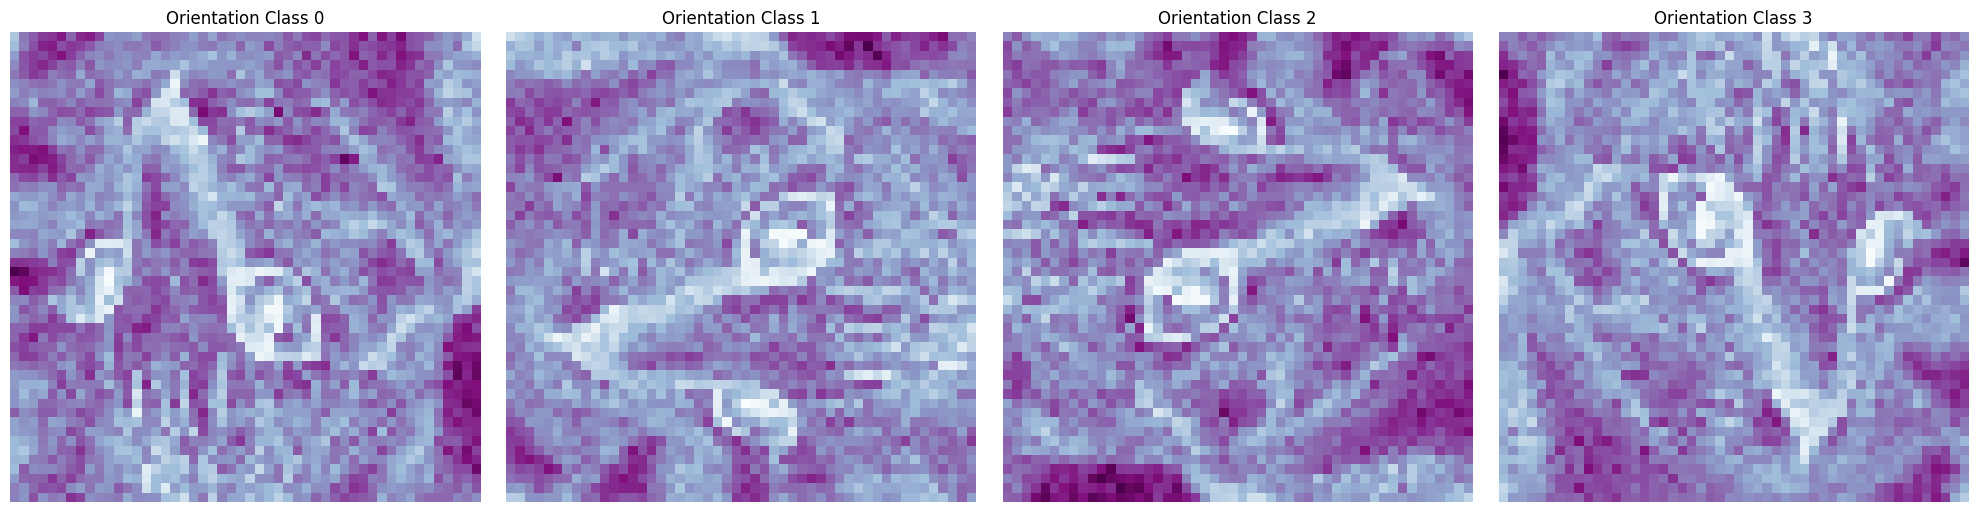

Cluster 0: 250 elements
Cluster 1: 236 elements
Cluster 2: 260 elements
Cluster 3: 254 elements


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
loaded = np.load('endeavour.npz')
task4 = loaded["task4"]
patterns = task4.reshape(-1, 50, 50)

# Part (a): Compute the average 2D pattern’s total pixel value
flat_patterns = task4  # Use the flattened version directly
average_total_pixel_value = np.mean(np.sum(flat_patterns, axis=1))
print("Average 2D pattern’s total pixel value:", average_total_pixel_value)

# Part (b): Render the average 2D pattern assuming all patterns have the same orientation
average_pattern = np.mean(flat_patterns, axis=0)
average_pattern_2d = average_pattern.reshape(50, 50)

plt.imshow(average_pattern_2d, cmap='Blues')
plt.title("Average 2D Pattern (Assuming Same Orientation)")
plt.axis('off')
plt.show()

# Normalize the data
scaler = StandardScaler()
flat_patterns_normalized = scaler.fit_transform(flat_patterns)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components based on explained variance
flat_patterns_pca = pca.fit_transform(flat_patterns_normalized)

# Run GMM multiple times and choose the one with minimal distortia score
best_gmm = None
best_labels = None
best_distortia = float('inf')

n_runs = 25  # Number of times to run GMM

for run in range(n_runs):
    gmm = GaussianMixture(n_components=4, random_state=run).fit(flat_patterns_pca)
    labels = gmm.predict(flat_patterns_pca)
    
    # Calculate distortia score
    distortia = 0
    for i in range(4):  # Number of clusters
        cluster_points = flat_patterns[labels == i]
        centroid_pca = gmm.means_[i].reshape(1, -1)
        centroid = scaler.inverse_transform(pca.inverse_transform(centroid_pca))
        distortia += np.sum(np.square(cluster_points - centroid))
    
    print(f"Run {run}: Distortia score = {distortia/1000}")
    
    # Update best result if current run has a lower distortia score
    if distortia < best_distortia:
        best_gmm = gmm
        best_labels = labels
        best_distortia = distortia

print("Best Distortia score:", best_distortia/1000)

# Step 2: Gather and average the rows of the design matrix according to orientation classes
orientation_averages = []

for i in range(4):
    class_patterns = flat_patterns[best_labels == i]
    average_class_pattern = np.mean(class_patterns, axis=0)
    orientation_averages.append(average_class_pattern)

# Step 3: Render the 2D images for each orientation class
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes):
    class_pattern_2d = orientation_averages[i].reshape(50, 50)
    ax.imshow(class_pattern_2d, cmap='BuPu')
    ax.set_title(f"Orientation Class {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Print the number of elements in each cluster
cluster_counts = np.bincount(best_labels)
for cluster_num, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num}: {count} elements")